# Test notebook for functional regression

## Importing

In [22]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import minmax_scale 
from sklearn.preprocessing import MinMaxScaler

from skfda.ml.regression import KNeighborsRegressor
from skfda.representation.basis import FourierBasis

from skfda.representation.grid import FDataGrid

from sklearn.metrics import root_mean_squared_error as rmse


## Files Reading

In [23]:
ds = xr.open_dataset('/data/ibougoudis/MOAD/files/integrated_original.nc')
ds2 = xr.open_dataset('/data/ibougoudis/MOAD/files/external_inputs.nc')

# ds = ds.isel(time_counter = (np.arange(0, len(ds.time_counter),2)), 
#     y=(np.arange(ds.y[0], ds.y[-1], 5)), 
#     x=(np.arange(ds.x[0], ds.x[-1], 5)))

# ds2 = ds2.isel(time_counter = (np.arange(0, len(ds2.time_counter),2)), 
#     y=(np.arange(ds2.y[0], ds2.y[-1], 5)), 
#     x=(np.arange(ds2.x[0], ds2.x[-1], 5)))

dataset = ds.sel(time_counter = slice('2007', '2007'))
dataset2 = ds2.sel(time_counter = slice('2007', '2007'))


## Datasets Preparation

In [24]:
test = np.stack([np.reshape(np.ravel(dataset['Temperature_(0m-15m)']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset['Temperature_(15m-100m)']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset['Salinity_(0m-15m)']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset['Salinity_(15m-100m)']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset2['Summation_of_solar_radiation']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset2['Mean_wind_speed']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset2['Mean_air_temperature']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    ])

x =  np.tile(dataset.x, len(dataset.y))
y =  np.tile(np.repeat(dataset.y, len(dataset.x)),1)

indx = np.where((~np.isnan(test[1]).any(axis=0)) & (x>10) & ((x>100) | (y<880)))
test = test[:,:,indx[0]]

# scaler1 = MinMaxScaler()
# test[0] = scaler1.fit_transform(test[0])

# scaler2 = MinMaxScaler()
# test[1] = scaler2.fit_transform(test[1])

# scaler3 = MinMaxScaler()
# test[2] = scaler3.fit_transform(test[2])

# scaler4 = MinMaxScaler()
# test[3] = scaler4.fit_transform(test[3])

# scaler5 = MinMaxScaler()
# test[4] = scaler5.fit_transform(test[4])

# scaler6 = MinMaxScaler()
# test[5] = scaler6.fit_transform(test[5])

# scaler7 = MinMaxScaler()
# test[6] = scaler7.fit_transform(test[6])

test[0] = minmax_scale(test[0])
test[1] = minmax_scale(test[1])
test[2] = minmax_scale(test[2])
test[3] = minmax_scale(test[3])
test[4] = minmax_scale(test[4])
test[5] = minmax_scale(test[5])
test[6] = minmax_scale(test[6])

test2 = np.reshape(np.ravel(dataset['Diatom_Production_Rate']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x)))
test2 = test2[:,indx[0]]
# scaler0 = MinMaxScaler()
# test2 = scaler0.fit_transform(test2)
test2 = test2.transpose()



In [25]:
# temp = np.reshape(test,(7,38*1838))
# scaler = MinMaxScaler()
# a = scaler.fit_transform(temp)
# test = np.reshape(a,(7,38,1838))

# temp = np.reshape(test2,(1,38*1838))
# scaler2 = MinMaxScaler()
# b = scaler2.fit_transform(temp)
# test2 = np.reshape(b,(1838,38))

In [26]:
input = np.transpose(test,axes=(2,1,0))
input = FDataGrid(input, np.arange(0,len(dataset.time_counter)))
target = FDataGrid(test2, np.arange(0,len(dataset.time_counter)))

# target = target.to_basis(FourierBasis(n_basis=5))


## Training 

In [27]:
from skfda.ml.regression import RadiusNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10, weights='distance', n_jobs=4)
knn.fit(input, target)

KNeighborsRegressor(n_jobs=4, n_neighbors=10, weights='distance')

In [30]:
dataset = ds.sel(time_counter = slice('2018', '2018'))
dataset2 = ds2.sel(time_counter = slice('2018', '2018'))


test = np.stack([np.reshape(np.ravel(dataset['Temperature_(0m-15m)']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset['Temperature_(15m-100m)']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset['Salinity_(0m-15m)']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset['Salinity_(15m-100m)']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset2['Summation_of_solar_radiation']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset2['Mean_wind_speed']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    np.reshape(np.ravel(dataset2['Mean_air_temperature']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x))),
    ])

x =  np.tile(dataset.x, len(dataset.y))
y =  np.tile(np.repeat(dataset.y, len(dataset.x)),1)

indx = np.where((~np.isnan(test[1]).any(axis=0)) & (x>10) & ((x>100) | (y<880)))
test = test[:,:,indx[0]]

# test[0] = scaler1.transform(test[0])

# test[1] = scaler2.transform(test[1])

# test[2] = scaler3.transform(test[2])

# test[3] = scaler4.transform(test[3])

# test[4] = scaler5.transform(test[4])

# test[5] = scaler6.transform(test[5])

# test[6] = scaler7.transform(test[6])

test[0] = minmax_scale(test[0])
test[1] = minmax_scale(test[1])
test[2] = minmax_scale(test[2])
test[3] = minmax_scale(test[3])
test[4] = minmax_scale(test[4])
test[5] = minmax_scale(test[5])
test[6] = minmax_scale(test[6])

test2 = np.reshape(np.ravel(dataset['Diatom_Production_Rate']), (len(dataset.time_counter), len(dataset.y) * len(dataset.x)))
test2 = test2[:,indx[0]]

# test2 = scaler0.transform(test2)
test2 = test2.transpose()


# temp = np.reshape(test,(7,38*1838))
# a = scaler.transform(temp)
# test = np.reshape(a,(7,38,1838))

# temp = np.reshape(test2,(1,38*1838))
# b = scaler2.transform(temp)
# test2 = np.reshape(b,(1838,38))

input = np.transpose(test,axes=(2,1,0))
input = FDataGrid(input, np.arange(0,len(dataset.time_counter)))

y_pred = knn.predict(input)

basis = FourierBasis(domain_range=(0, len(dataset.time_counter)),n_basis=5)
x = y_pred.to_basis(basis)
y = np.array(y_pred.to_grid(np.arange(0,len(dataset.time_counter))).data_matrix)
b = np.squeeze(y,2)
# b = scaler0.inverse_transform(b.transpose())
# b = b.transpose()


print(np.corrcoef(np.ravel(test2), np.ravel(b))[0][1])
print(rmse(np.ravel(test2),np.ravel(b)))


0.4346427811600474
1.6014985701185509e-06


In [29]:
indx2 = np.full((len(dataset.time_counter), len(dataset.y) * len(dataset.x)),np.nan)

indx2[:,indx[0]] = b.transpose()

new = np.reshape(indx2,(len(dataset.time_counter),len(dataset.y),len(dataset.x))) 

new.shape# Preparation of the dataarray 
clusters = xr.DataArray(new,
    coords = {'time_counter': dataset.time_counter,'y': dataset.y, 'x': dataset.x},
    dims = ['time_counter','y','x'],
    attrs=dict(description="Clusters of the performed functional analysis algorithm",
    long_name ="Cluster",
    units="count"))


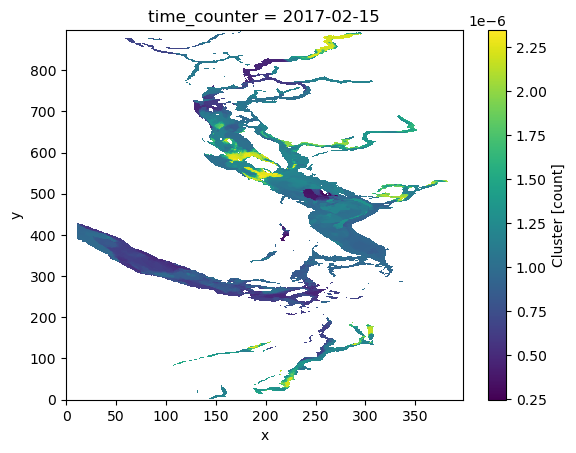

In [31]:
clusters[0].plot()

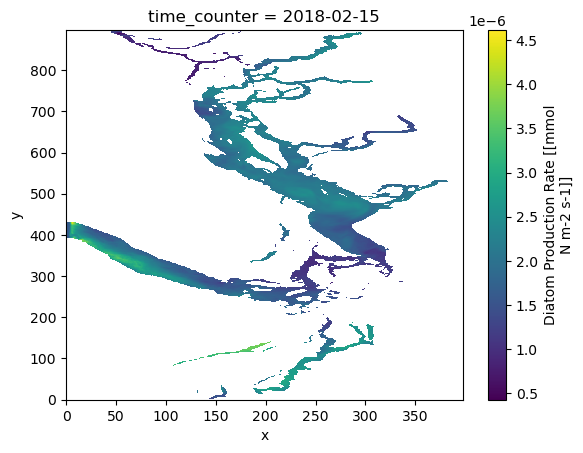

In [32]:
dataset.Diatom_Production_Rate[0].plot()